# Installation und Import

In [ ]:
!pip install --upgrade pip
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import plotly.express as px
import numpy as np

# Zusatzmaterial
In diesem Abgschnitt gibt es einige Python-Methoden, die in der Haupterklärung nicht ausführlich behandelt wurden. Diese Methoden können jedoch nützlich sein, wenn Du tiefer in die Funktionsweise des Codes eintauchen möchtest.

In [ ]:
def show_example(X, y, index):
    """
    Zeigt ein Bild aus einer Sammlung von Bildern zusammen mit seiner Beschriftung und Pixelstatistik an.
    
    Args:
    - X: Ein numpy-Array der Form (n, Höhe, Breite), das die Bilder darstellt.
    - y: Ein numpy array of shape (n, ), das die entsprechenden Labels darstellt.
    - index: Eine ganze Zahl, die den Index des anzuzeigenden Bildes angibt.
    
    Rückgabe:
    - Keine
    
    Nebeneffekte:
    - Druckt die Form des Bildes.
    - Druckt die Bezeichnung des Bildes.
    - Gibt den Wert des mittleren Pixels des Bildes aus.
    - Druckt die minimalen und maximalen Pixelwerte des Bildes.
    - Zeigt das Bild mit Hilfe der Plotly Express-Bibliothek an.
    """
    
    # Da die Label in CIFAR10 sind numerisch, beschreiben aber die Objekte in dieser Liste
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    image = X[index]
    label = y[index]

    if type(label) == np.ndarray:
        label = label[0] # this is because the label itself might be packed into a list.
        label = y[index][0]

    print(label)

    print("Struktur vom Bild:", image.shape) # The shape can be read (x, y, pixel-values)
    print("Label:", class_names[label])
    print("Pixel in der Mitte:", image[int(image.shape[0]/2), int(image.shape[1]/2)])
    print("Farbwerte (dunkel -> hell):", image.min(), "to", image.max())
    fig = px.imshow(image, binary_string=True)
    if 'google.colab' in str(get_ipython()):
        fig.show(renderer='colab') 
    else:
        fig.show(renderer='iframe') 
    return np.array([image])

In [ ]:
def plot_history(history):
    """
    Plotten Sie den Trainings- und Validierungsverlust und die Genauigkeit mit Matplotlib und Plotly.

    Args:
    - history: Ein Keras History-Objekt, das von der Methode "fit()" zurückgegeben wird.
    
    Rückgabe:
    - Nichts.
    """
    # Trainings- und Validierungsverluste
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Genauigkeit
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Anzahl der Epochen
    epochs = range(1, len(train_loss) + 1)

    # Alternative: interaktive Plotly-Diagramme
    fig_loss = px.line(history.history, y=['loss', 'val_loss'],
                       labels={'index': 'Epoch', 'value': 'Loss', 'loss': 'Training loss'}, 
                       title='Training and validation loss')

    fig_acc = px.line(history.history, y=['accuracy', 'val_accuracy'], labels={'index': 'Epoch', 'value': 'Accuracy'}, 
                      title='Training and validation accuracy')

    new_names_loss = {'loss':'Training loss', 'val_loss': 'Validation loss'}
    fig_loss.for_each_trace(lambda t: t.update(name = new_names_loss[t.name],
                                          legendgroup = new_names_loss[t.name],
                                          hovertemplate = t.hovertemplate.replace(t.name, new_names_loss[t.name])
                                         )
                      )

    new_names_acc = {'accuracy':'Training accuracy', 'val_accuracy': 'Validation accuracy'}
    fig_acc.for_each_trace(lambda t: t.update(name = new_names_acc[t.name],
                                          legendgroup = new_names_acc[t.name],
                                          hovertemplate = t.hovertemplate.replace(t.name, new_names_acc[t.name])
                                         )
                      )

    fig_loss.show()
    fig_acc.show()

#Der CIFAR10 Datensatz

Der [CIFAR-10](!https://www.cs.toronto.edu/~kriz/cifar.html) Datensatz ist ein umfangreicher Datensatz von 60.000 Farbbildern, die in 10 Klassen unterteilt sind. Jede Klasse umfasst 6.000 Bilder von Objekten, die in der realen Welt vorkommen, wie Flugzeuge, Autos, Tiere und Schiffe.

Ein Unterschied zwischen dem CIFAR-10 Datensatz und dem MNIST Datensatz besteht darin, dass CIFAR-10 Farbbilder unterschiedlicher Objekte, während MNIST Graustufenbilder von handgeschriebenen Ziffern enthält. Ein weiterer Unterschied ist, dass die Bilder im CIFAR-10 Datensatz 32x32 Pixel groß sind, während die Bilder im MNIST Datensatz 28x28 Pixel haben.

Diese Unterschiede machen den CIFAR-10 Datensatz zu einer größeren und komplexeren Herausforderung für neuronale Netze, während der MNIST Datensatz eher als Einstiegspunkt für das Training von Bilderkennungsalgorithmen verwendet wird.

In [ ]:
# Zuerst werden die Daten geladen.
(x_train, y_train), (x_val, y_val) = datasets.cifar10.load_data()
# Da CIFAR10 keine finalen Test-Daten hat, kannst du auch einfach die letzen 10.000 Trainingsdaten dazu verwenden.
x_train, x_test = x_train[:40000], x_train[40000:]
y_train, y_test = y_train[:40000], y_train[40000:]

# Normalisierung der Farbbilder.
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

In [ ]:
# Mit .shape kannst Du sehen wie der Aufbau der Daten ist.
# Du kannst sehen, dass der erste Eintrag die Gesamtzahl der Daten angibt.
# Die darauf folgenden drei Werte hingegen geben die Größe (Höhe, Breite) sowie die Farbkanäle RBG der Bilder an.
print("Trainings Daten:", x_train.shape)
print("Validation Daten:", x_val.shape)
print("Test Daten:", x_test.shape)
# Bei den Labeln ist es anders als bei den Bilddaten, hier haben wir nur einzelne Werte.
print("Trainings Label:", y_train.shape)
print("Validation Label:", y_val.shape)
print("Test Label:", y_test.shape)

Trainings Daten: (40000, 32, 32, 3)
Validation Daten: (10000, 32, 32, 3)
Test Daten: (10000, 32, 32, 3)
Trainings Label: (40000, 1)
Validation Label: (10000, 1)
Test Label: (10000, 1)


## Aufbau von Farbbildern

Der CIFAR-10 Datensatz enthält Farbbilder, die in der Regel eine Größe von 32x32 Pixeln haben. Jedes Bild wird durch drei Farbkanäle dargestellt: Rot, Grün und Blau (RGB). Jeder Kanal wird als eine Matrix von 32x32 Werten repräsentiert, wobei jeder Wert die Intensität der entsprechenden Farbe an einer bestimmten Position im Bild angibt.

Auch bei noralisierten Farbbildern reichen die Werte für jeden Kanal von 0 bis 1, wobei 0 für das Fehlen der Farbe und 1 für maximale Intensität steht. Durch Kombination der drei Kanäle können die Farben jedes Pixels im Bild dargestellt werden.


6
Struktur vom Bild: (32, 32, 3)
Label: frog
Pixel in der Mitte: [0.96078431 0.92941176 0.88627451]
Farbwerte (dunkel -> hell): 0.0 to 1.0



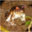

In [ ]:
# Hier kannst du interaktiv ein Beispiel betrachten.
example = show_example(x_train, y_train, 0)

# Aufbau eines CNN
Convolutional Neural Networks (CNNs) sind eine Art von künstlichen neuronalen Netzwerken, die besonders gut für die Verarbeitung von Bildern geeignet sind.

Ein CNN besteht aus verschiedenen Schichten, die nacheinander auf das Bild angewendet werden. Die ersten Schichten eines CNNs sind oft Convolutional Layers. Diese Schichten suchen im Bild nach bestimmten Mustern, wie zum Beispiel Ecken, Kanten oder Formen, und speichern diese Merkmale als Ergebnis ab.

## Convolutional Schichten

Im Code, den Du siehst, wird in der ersten Conv2D-Schicht das Eingabebild durch 32 sogenannte Filter bearbeitet. Ein Filter ist wie eine kleine Schablone, die auf das Bild gelegt wird und bestimmte Muster sucht. Ein Filter kann zum Beispiel nach vertikalen oder horizontalen Kanten suchen oder nach anderen spezifischen Mustern.

Die Größe des Filters in diesem Code beträgt 3x3 Pixel. Die Conv2D-Schicht geht also Pixelweise durch das Bild und versucht, in jedem Ausschnitt von 3x3 Pixeln das Muster zu finden. Dabei wird für jeden Ausschnitt ein neues Ergebnis berechnet, das ein Merkmal des Bildes darstellt.

Nach der ersten Schicht kommt eine MaxPooling2D-Schicht. Diese Schicht verkleinert das Bild, indem sie die Ergebnisse der vorherigen Schicht zusammenfasst. Dabei wird das Bild in Quadrate von 2x2 Pixeln aufgeteilt und für jedes Quadrat der höchste Wert genommen. Durch diese Zusammenfassung wird das Bild vereinfacht und es werden unwichtige Details entfernt.

In der zweiten Schicht wird das Bild wieder durch Filter geschickt, die auf die Merkmale der ersten Schicht aufbauen. Es werden diesmal 64 Filter verwendet, um noch spezifischere Merkmale zu finden.

## Fully-Connected Schichten

Nach den Convolutional-Schichten folgen in der Regel Fully-Connected Schichten, die die Merkmale klassifizieren und zur Ausgabe führen. In diesem Zusammenhand bedeutet Fully-Connected, dass jedes Neuron in einer Schicht mit jedem Neuron in der darauffolgenden Schicht verbunden ist, also Informationen an jedes Neuron der nächsten Schicht weitergibt.

In diesem Code wird eine Flatten-Schicht verwendet, um die Ausgabe der vorherigen Schicht in einen Vektor umzuwandeln. Das kannst Du damit vergleichen, dass das Bild, wie bei einem Aktenvernichter, zeilenweise zerschnitten und der Länge nach wieder zusammengesetzt wird.
Dieser Vektor wird dann durch zwei Dense-Schichten weiterverarbeitet und in die letzte Dense-Schicht hat 10 Neuronen weitergereicht. Die Softmax-Aktivierungsfunktion wird verwendet, um die Wahrscheinlichkeiten der Vorhersage der 10 möglichen Klassen zu normalisieren und die Ergebnisse interpretierbar zu gestalten.

In [ ]:
model = models.Sequential()

# Die Convolutional Schichten
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Die Fully-Connected Schichten
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

# Interpretation

Wenn Du Dir das Modell ansiehst, wirst Du vielleicht verwirrt sein, weil die Dimensionalität der Eingabedaten für jede Schicht abnimmt. Ebenso könnte es aber auch gut sein, dass Du nicht ganz verstehst, wie eine Convolutional Schicht ihre Parameter erzeugt. 
Daher hier eine kurze Erklärung um das CNNs besser zu interpretieren.

## Paramters einer Convolutional Schicht
Betrachte zu Beginn die erste Conv2D Schicht mit 896 Parametern.
Die Anzahl der Parameter in dieser Schicht hängt von unterschiedlichen Faktoren ab, wie der Größe der Filter, der Anzahl der Filter und der Größe des Eingabebildes.

Das abgebiltete CNN, erzeugt für die erste Conv2D Schicht 32 Filter mit einer Größe von 3x3 Pixeln und eine Eingabeform von 32x32x3 Pixeln (3 für die Farbkanäle RGB). Jeder Filter hat also eine Größe von 3x3x3 = 27 Elemente. Da jeder Filter mit jedem Ausschnitt im Bild getestet werden muss, ergibt das insgesamt 32 x 27 = 864 Parameter.

Zusätzlich gibt es noch einen Bias-Wert für jeden Filter, der die Aktivierung der Filter steuert. Daher haben wir insgesamt 864 + 32 = 896 Parameter für die erste Conv2D Schicht.

## Veränderung Dimensionalität
Die Dimensionalität der Eingabe verändert sich im CNN, weil es Filter auf die Eingabe anwendet, welche die Größe und damit die Dimensionalität der Eingabe verändern können.

In diesem CNN wird eine Eingabe von 32x32x3 Pixeln (Breite x Höhe x Farbkanäle) verwendet. In der ersten Conv2D Schicht werden 32 Filter mit einer Größe von 3x3 Pixeln auf die Eingabe angesetzt. Dies führt zu 32 Ausgaben (auch Feature Maps genannt), die jeweils eine Größe von 30x30 Pixeln haben. Der Grund dafür ist, dass die Filter die Ränder des Eingabebildes nicht überschreiten können und somit eine Ausgabe, die kleiner ist als die Eingabe, erzeugen.

Anschließend wird eine MaxPooling2D Schicht mit einem 2x2 Pixel großen Fenster verwendet, um die Dimensionalität der Ausgabe zu reduzieren. Diese Schicht extrahiert den größten Wert aus jedem 2x2 Pixelbereich der Eingabe und gibt eine Ausgabe zurück, die halb so groß ist wie die Eingabe. In diesem Fall wird die Ausgabe von 30x30 auf 15x15 Pixel verkleinert.

# Trainieren und Validieren des CNN

In diesem Codeabschnitt siehst Du, wie das CNN trainiert wird, um Bilder zu klassifizieren. Anfänglich wurde der Datensatz in drei Teile aufgeteilt: Trainings-, Validierungs- und Testdaten.

In diesem Abschnitt kommen die drei Teile des Datensatzes tatsächlich zum Einsatz, doch vorher ein paar Worte noch:

Die Trainingsdaten werden verwendet, um das Modell zu trainieren. Das Modell nutzt diese Daten, um seine Gewichte und Parameter anzupassen, um eine möglichst gute Leistung auf den Trainingsdaten zu erzielen.

Die Validierungsdaten werden verwendet, um die Leistung des Modells zu bewerten, während es trainiert wird. Das Modell nutzt diese Daten, um die Hyperparameter und die Architektur des Modells zu optimieren und eine Überanpassung an die Trainingsdaten zu vermeiden. Die Validierungsdaten helfen dabei, die beste Modellkonfiguration auszuwählen, die die bestmögliche Leistung auf unbekannten Daten erzielt.

Die Testdaten werden verwendet, um die endgültige Leistung des Modells auf unbekannten Daten zu bewerten. Diese Daten wurden während des Trainings und der Validierung nicht verwendet und dienen daher als objektiver Maßstab für die Leistung des Modells.

Durch die Verwendung von Trainings-, Validierungs- und Testdaten können wir sicherstellen, dass das Modell nicht nur auf den Trainingsdaten, sondern auch auf unbekannten Daten gut abschneidet. Es ist wichtig, dass diese drei Datensätze getrennt und unabhängig voneinander gehalten werden, um eine objektive Bewertung des Modells zu gewährleisten.

In [ ]:
# Aus Woche 11 bekannt.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
# Aus Woche 11 bekannt.
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_val, y_val))

Epoch 1/5
1250/1250 [==============================] - 84s 66ms/step - loss: 1.4231 - accuracy: 0.4902 - val_loss: 1.1554 - val_accuracy: 0.5933
Epoch 2/5
1250/1250 [==============================] - 72s 58ms/step - loss: 1.0496 - accuracy: 0.6327 - val_loss: 1.0261 - val_accuracy: 0.6439
Epoch 3/5
1250/1250 [==============================] - 71s 57ms/step - loss: 0.8974 - accuracy: 0.6851 - val_loss: 0.9895 - val_accuracy: 0.6525
Epoch 4/5
1250/1250 [==============================] - 70s 56ms/step - loss: 0.7989 - accuracy: 0.7209 - val_loss: 0.9695 - val_accuracy: 0.6640
Epoch 5/5
1250/1250 [==============================] - 69s 56ms/step - loss: 0.6960 - accuracy: 0.7551 - val_loss: 0.9634 - val_accuracy: 0.6736


In [ ]:
plot_history(history)

# Testen des CNN auf unbekannten Daten

Das Testen eines CNN auf unbekannten Daten ist ein aufregender Moment, denn es gibt Dir einen Einblick in die tatsächliche Leistungsfähigkeit des Modells. Nach dem Training und der Validierung ist es Zeit, das Modell zu testen, indem Du es auf einen Satz von Daten anwendest, die das CNN noch nie zuvor gesehen hat.

Die Idee dahinter ist, herauszufinden, ob das Modell in der Lage ist, gut zu generalisieren - also, ob es in der Lage ist, nützliche Muster in Bildern zu erkennen, die es zuvor noch nicht gesehen hat. Wenn das Modell eine hohe Genauigkeit auf diesen unbekannten Daten aufweist, dann kannst Du ziemlich zuversichtlich sein, dass das Modell gut funktioniert und, ob es tatsächlich in der Lage ist, die gewünschten Muster in den Bildern zu erkennen.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
# Du siehst, dass das CNN mit gut 68% recht akkurate Vorhersagen treffen kann.
print("Test accuracy:", round(test_acc, 4)*100, "%")

313/313 - 4s - loss: 0.9479 - accuracy: 0.6796 - 4s/epoch - 13ms/step
Test accuracy: 67.96 %


In [ ]:
# Du kannst mit dem CNN auch direkt Vorhersagen treffen.
predictions = model.predict(x_test)
y_predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 5s 17ms/step


1
Struktur vom Bild: (32, 32, 3)
Label: automobile
Pixel in der Mitte: [0.96078431 0.99607843 0.97254902]
Farbwerte (dunkel -> hell): 0.00784313725490196 to 1.0



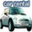

4
Struktur vom Bild: (32, 32, 3)
Label: deer
Pixel in der Mitte: [0.66666667 0.40784314 0.16862745]
Farbwerte (dunkel -> hell): 0.06274509803921569 to 0.8901960784313725



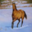

In [ ]:
# Hier wird ein Auto erkannt.
example_prediction_correct = show_example(x_test, y_predictions, 0)
# Hier wird ein Pferd nicht erkannt.
example_prediction_incorrect = show_example(x_test, y_predictions, 10)